<a href="https://colab.research.google.com/github/ektamistry/Machine-Learning/blob/main/Parameter_Estimation_in_Bayesian_Networks_Using_the_EM_Algorithm_E_Step%2C_M_Step%2C_and_Applications_in_pgmpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I070
Ekta Mistry

Batch 1

In [ ]:
pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.6 MB/s eta 0:00:00


#Create the model

In [ ]:
import pgmpy
from pgmpy.models import BayesianNetwork
model = BayesianNetwork(
[
("Genre","Jim's_Rating"),
("Genre","Martha's_Rating"),
]
)

#Define CPDs

In [ ]:
from pgmpy.factors.discrete import TabularCPD
cpd_G = TabularCPD(
variable = "Genre", variable_card = 2, values = [[0.5],[0.5]],
)
cpd_R1 = TabularCPD(
variable = "Jim's_Rating",
variable_card = 2,
values = [[0.4, 0.6], [0.6,0.4]],
evidence = ["Genre"],
evidence_card = [2],
)
cpd_R2 = TabularCPD(
variable = "Martha's_Rating",
variable_card = 2,
values = [[0.6,0.4],[0.4,0.6]],
evidence = ["Genre"],
evidence_card = [2],
)

#Adding CPD to our Model

In [ ]:
model.add_cpds(cpd_G, cpd_R1, cpd_R2)
model.check_model()

True

In [ ]:
model.nodes()

NodeView(('Genre', "Jim's_Rating", "Martha's_Rating"))

#Creating model

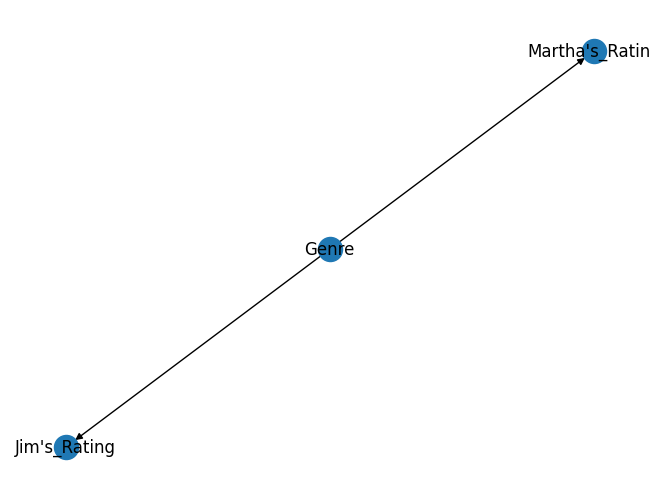

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
nx_graph = nx.DiGraph(model.edges())
nx.draw(nx_graph,with_labels = True)
plt.show()

In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.sampling import BayesianModelSampling
samples = BayesianModelSampling(model).forward_sample(size = int(1e5))
samples.head()
mle = MaximumLikelihoodEstimator(model = model, data = samples)

  0%|          | 0/3 [00:00<?, ?it/s]

Estimating the CPD for a single node

In [ ]:
mle.get_parameters()[:3]

[<TabularCPD representing P(Genre:2) at 0x7f8224e2f6a0>,
 <TabularCPD representing P(Jim's_Rating:2 | Genre:2) at 0x7f821c494910>,
 <TabularCPD representing P(Martha's_Rating:2 | Genre:2) at 0x7f8224e2f7c0>]

In [ ]:
print(mle.estimate_cpd(node = 'Genre'))

+----------+---------+
| Genre(0) | 0.50079 |
+----------+---------+
| Genre(1) | 0.49921 |
+----------+---------+


In [ ]:
print(mle.estimate_cpd(node = "Martha's_Rating"))

+--------------------+--------------------+--------------------+
| Genre              | Genre(0)           | Genre(1)           |
+--------------------+--------------------+--------------------+
| Martha's_Rating(0) | 0.5993130853251862 | 0.3995312593898359 |
+--------------------+--------------------+--------------------+
| Martha's_Rating(1) | 0.4006869146748138 | 0.6004687406101641 |
+--------------------+--------------------+--------------------+


In [ ]:
import numpy as np
np.allclose(
model.get_cpds("Jim's_Rating").values,mle.estimate_cpd("Jim's_Rating").
values, atol = 0.01
)

True

In [ ]:
from pgmpy.estimators import BayesianEstimator
best = BayesianEstimator(model = model, data = samples)
print(best.estimate_cpd(node = "Jim's_Rating",prior_type = "BDeu",equivalent_sample_size = 1000))

+-----------------+---------------------+--------------------+
| Genre           | Genre(0)            | Genre(1)           |
+-----------------+---------------------+--------------------+
| Jim's_Rating(0) | 0.39901935585915105 | 0.5980642986057396 |
+-----------------+---------------------+--------------------+
| Jim's_Rating(1) | 0.600980644140849   | 0.4019357013942603 |
+-----------------+---------------------+--------------------+


#Uniform pseudo count for each state

In [ ]:
print(best.estimate_cpd(node = "Jim's_Rating", prior_type = "BDeu",pseudo_counts = 100))

+-----------------+--------------------+--------------------+
| Genre           | Genre(0)           | Genre(1)           |
+-----------------+--------------------+--------------------+
| Jim's_Rating(0) | 0.3980162335393309 | 0.5990415335463258 |
+-----------------+--------------------+--------------------+
| Jim's_Rating(1) | 0.6019837664606691 | 0.4009584664536741 |
+-----------------+--------------------+--------------------+


/usr/local/lib/python3.9/dist-packages/pgmpy/estimators/BayesianEstimator.py:193: UserWarning: pseudo count specified with bdeu prior. It will be ignored, use dirichlet prior for specifying pseudo_counts
  warn(


#Learning CPD for all nodes of the model

In [ ]:
best.get_parameters(prior_type = "BDeu", equivalent_sample_size = 1000)[:10]

[<TabularCPD representing P(Genre:2) at 0x7f8219107640>,
 <TabularCPD representing P(Jim's_Rating:2 | Genre:2) at 0x7f8219107340>,
 <TabularCPD representing P(Martha's_Rating:2 | Genre:2) at 0x7f821bc17fd0>]

In [ ]:
model.fit(

data = samples,
estimator = BayesianEstimator,
prior_type = "BDeu",
equivalent_sample_size = 1000,
)
print(model.get_cpds("Jim's_Rating"))

+-----------------+---------------------+--------------------+
| Genre           | Genre(0)            | Genre(1)           |
+-----------------+---------------------+--------------------+
| Jim's_Rating(0) | 0.39901935585915105 | 0.5980642986057396 |
+-----------------+---------------------+--------------------+
| Jim's_Rating(1) | 0.600980644140849   | 0.4019357013942603 |
+-----------------+---------------------+--------------------+


#Observations
The EM algorithm is commonly used to estimate the parameters of Bayesian networks when there is incomplete data. It consists of two steps, the E step and the M step, where the expected values of missing data are computed in the E step and the parameters are updated in the M step by maximizing the log-likelihood function with respect to the expected values. The algorithm converges to a local maximum of the log-likelihood function, but not necessarily the global maximum. It can handle different types of Bayesian networks and can also be extended to handle structural learning of Bayesian networks.

#Conclusion

Therfore, I have implemented the EM algorithm on Bayesian networks via pgmpy

